# Three Methods: Boston housing example

### Imports y config básica

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

plt.rcParams["font.size"] = 12

### Cargar datos: boston

In [ ]:
# Cargar datos tipo Boston (del libro)
boston = pd.read_csv("Data/Boston.csv")  # adapta la ruta si hace falta
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Exploración rápida de datos

In [ ]:
print("Dimensiones:", boston.shape)
boston.describe()

Dimensiones: (506, 14)


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


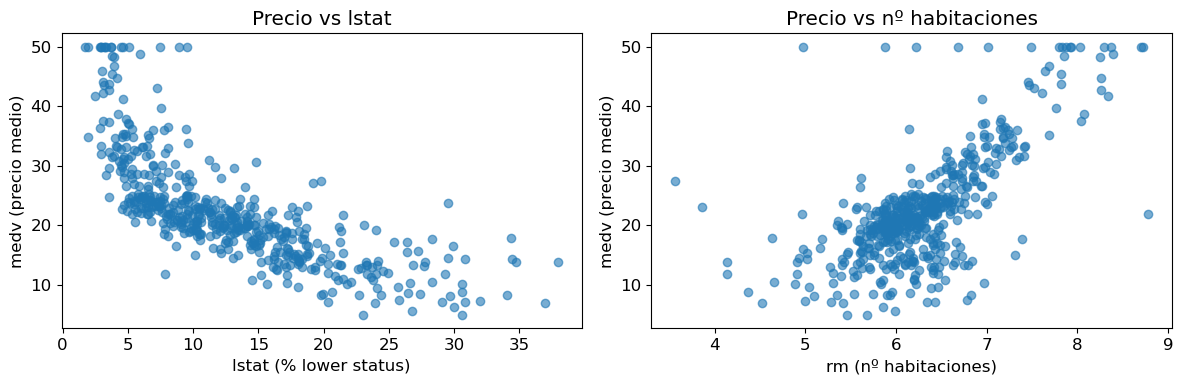

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# medv vs lstat (porcentaje de población de bajo status)
ax[0].scatter(boston["lstat"], boston["medv"], alpha=0.6)
ax[0].set_xlabel("lstat (% lower status)")
ax[0].set_ylabel("medv (precio medio)")
ax[0].set_title("Precio vs lstat")

# medv vs rm (número de habitaciones)
ax[1].scatter(boston["rm"], boston["medv"], alpha=0.6)
ax[1].set_xlabel("rm (nº habitaciones)")
ax[1].set_ylabel("medv (precio medio)")
ax[1].set_title("Precio vs nº habitaciones")

plt.tight_layout()
plt.show()

### Crear train / test

In [ ]:
X = boston.drop(columns=["medv"]).values
y = boston["medv"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape

((354, 13), (152, 13))

### Arbol de regresión simple

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)

y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print(f"MSE test (árbol):  {mse_tree:.2f}")
print(f"RMSE test (árbol): {rmse_tree:.2f}")

MSE test (árbol):  19.44
RMSE test (árbol): 4.41


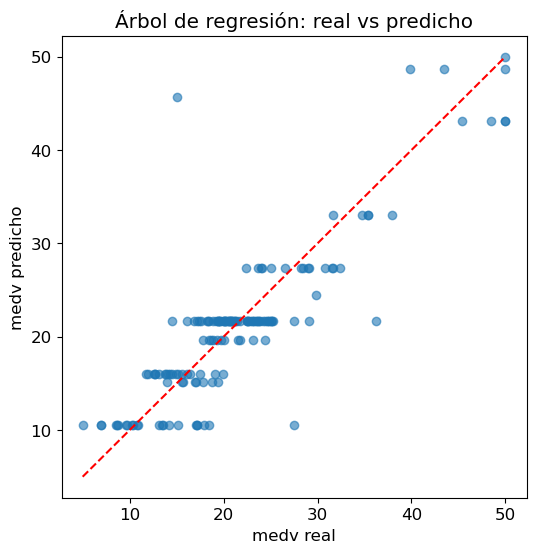

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--")
plt.xlabel("medv real")
plt.ylabel("medv predicho")
plt.title("Árbol de regresión: real vs predicho")
plt.show()

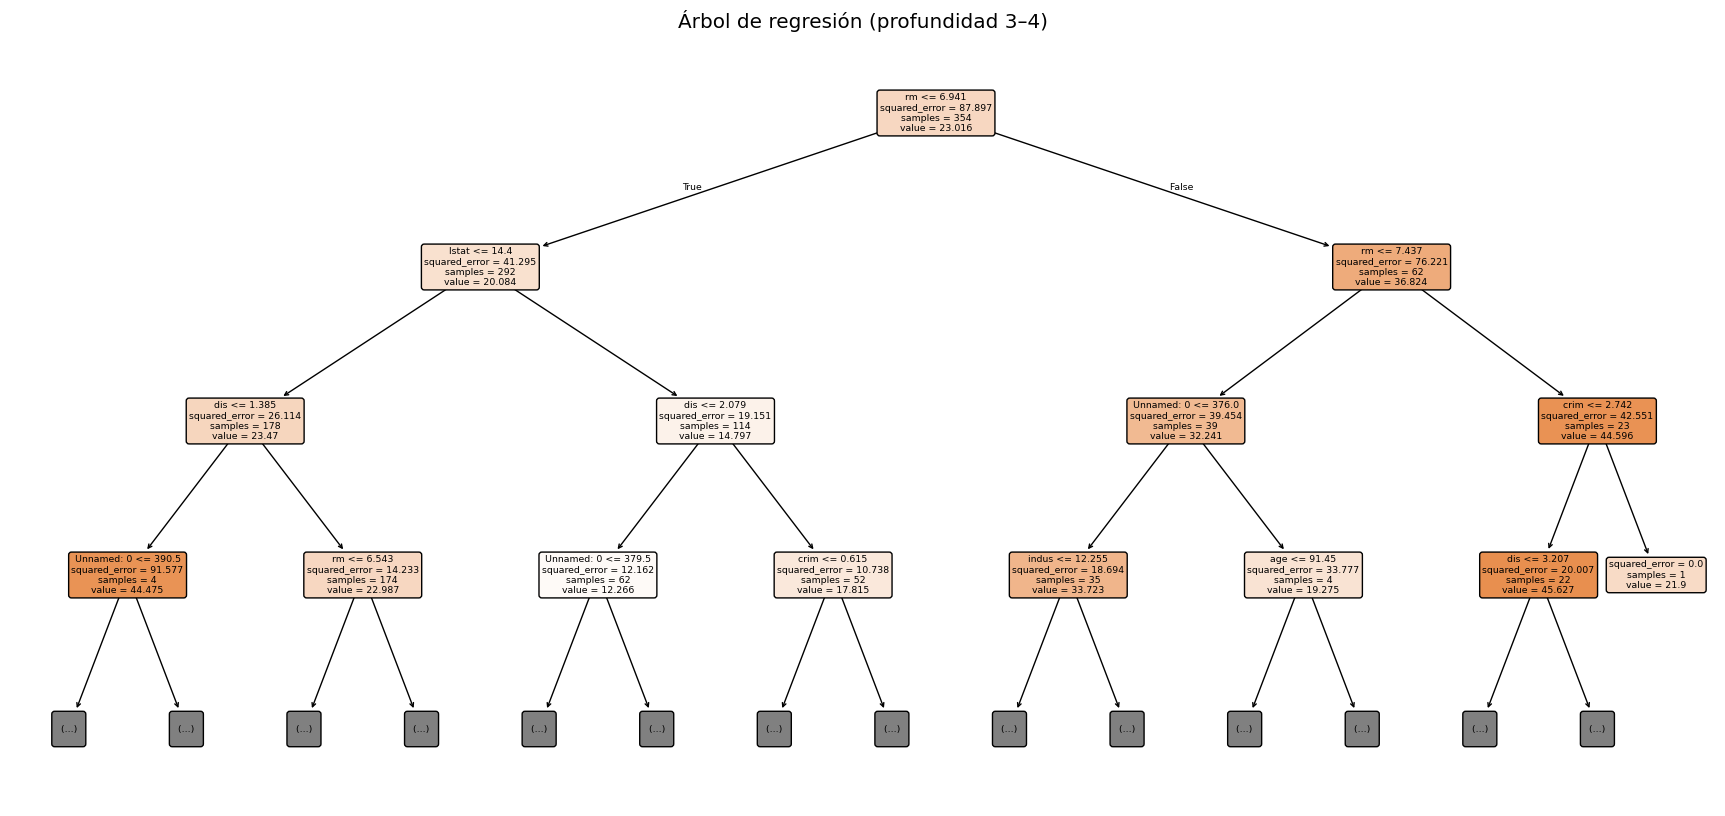

In [ ]:
plt.figure(figsize=(22, 10))
plot_tree(
    tree_reg,
    feature_names=boston.drop(columns=["medv"]).columns,
    filled=True,
    rounded=True,
    max_depth=3  # por si quieres recortarlo un poco
)
plt.title("Árbol de regresión (profundidad 3–4)")
plt.show()

### Random Forest

In [ ]:
rf_reg = RandomForestRegressor(
    n_estimators=300,
    max_features="sqrt",
    random_state=42
)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"MSE test (Random Forest):  {mse_rf:.2f}")
print(f"RMSE test (Random Forest): {rmse_rf:.2f}")

MSE test (Random Forest):  9.69
RMSE test (Random Forest): 3.11


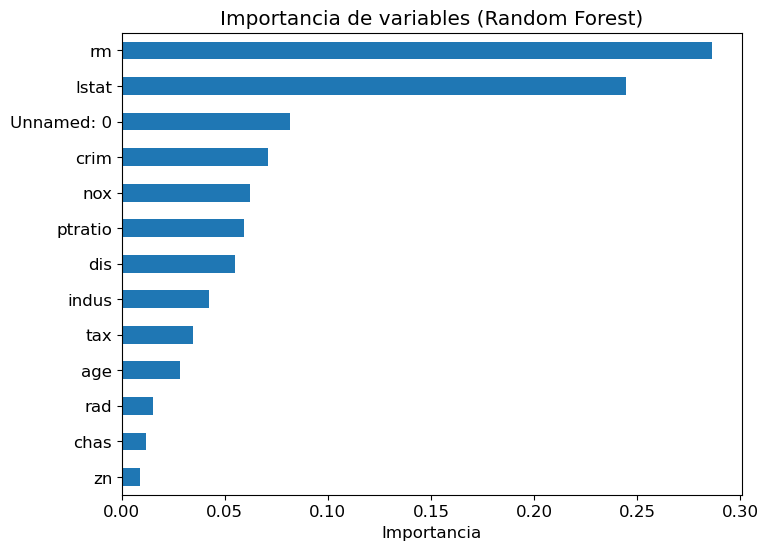

In [ ]:
importances = pd.Series(
    rf_reg.feature_importances_,
    index=boston.drop(columns=["medv"]).columns
)

importances.sort_values(ascending=True).plot(kind="barh", figsize=(8, 6))
plt.title("Importancia de variables (Random Forest)")
plt.xlabel("Importancia")
plt.show()

### Boosting

In [ ]:
gb_reg = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gb_reg.fit(X_train, y_train)

y_pred_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print(f"MSE test (Boosting):  {mse_gb:.2f}")
print(f"RMSE test (Boosting): {rmse_gb:.2f}")

MSE test (Boosting):  9.76
RMSE test (Boosting): 3.12


### Comparativa

In [ ]:
results_reg = pd.DataFrame({
    "Model": ["Árbol", "Random Forest", "Boosting"],
    "RMSE": [rmse_tree, rmse_rf, rmse_gb]
})
results_reg

,Model,RMSE
0,Árbol,4.409044
1,Random Forest,3.113377
2,Boosting,3.124755


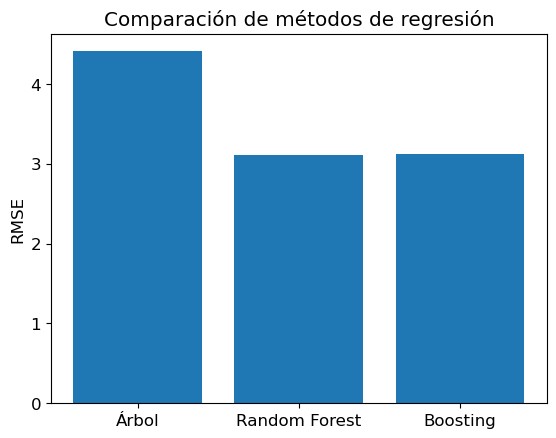

In [ ]:
plt.bar(results_reg["Model"], results_reg["RMSE"])
plt.ylabel("RMSE")
plt.title("Comparación de métodos de regresión")
plt.show()